Activité: Effectuez une régression linéaire avec Scikit-learn
================================================

Instructions
-----------------

Dans cette activité, vous allez faire appel à tout ce que vous avez étudié dans la deuxième partie du cours. Nous allons nous intéresser à la relation entre la distance qui nous sépare d'une galaxie, et la vitesse à laquelle elle s'éloigne de nous. Cette relation fut découverte pour la première fois par Erwin Hubble en 1929. Son article est disponible ici. 

Pour cela, vous aurez besoin du fichier `hubble.csv`.

Votre tâche consiste à charger le contenu de ce fichier grâce à Pandas, regarder les données qu'elle contient, et effectuer une régression linéaire entre les deux variable `distance` et `velocity`. 

Pour faire cette régression, vous devez utiliser la bibliothèque `scikit-learn`. 
La page de documentation la plus approprié pour cette activité est 
[ici](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Livrables
-------------

Vous devrez aussi visualiser vos résultats, avec des graphiques de qualité (n'hésitez pas à relire le chapitre sur matplotlib).

Ces graphiques doivent inclure à la fois les points de données, et la courbe obtenue grâce à la régression linéaire.

Commentaires
---------------------

Dans cette exercice, nous utilisons:
- la biliothèque `pandas` pour charger le fichier,
- le module `linear_model` de la bibliothèque `scikit-learn` pour effectuer la régression linéaire,
- la bibliothèque `matplotlib` pour réaliser les graphiques.

**Attention**: le fichier hubble.csv utilise `;` comme séparateur.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt

# charge le fichier hubble.csv a l'aide de la bibliotheque pandas
# ATTENTION - le separateur est ;
hubble = pd.read_csv("hubble.csv", sep=';')

## Vérification des données

   distance  recession_velocity
0     0.032                 170
1     0.034                 290
2     0.214                -130
3     0.263                 -70
4     0.275                -185


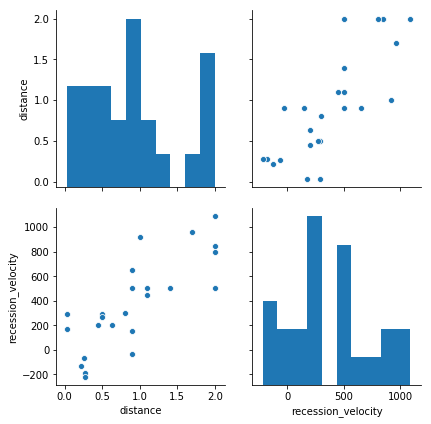

In [2]:
# affiche les 5 premieres lignes
print(hubble.head())

# graphiques par paire avec le module seaborn 
sns.pairplot(hubble, height=3.0);

## Conditionnement des données

In [3]:
# numpy array
distance = hubble['distance'].values
velocity = hubble['recession_velocity'].values

# reshape array for sklearn method
distance = distance.reshape(len(distance), 1)
velocity = velocity.reshape(len(velocity), 1)

## Régression linéaire

Droite de regression d'equation: y = 454.1584409226286 x + -40.783649095860596


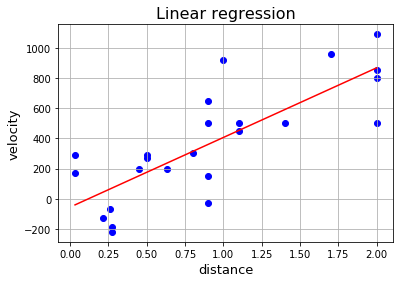

In [4]:
regression_1 = linear_model.LinearRegression()

# fit distance vs. velocity
regression_1.fit(distance, velocity)

# Recuperation des parametres de la droite de regression
m1 = regression_1.coef_[0][0]
b1 = regression_1.intercept_[0]

# ecrire l'equation de la droite
print("Droite de regression d'equation: y = {} x + {}".format(m1, b1))

min_x1 = np.min(distance)
max_x1 = np.max(distance)

fig = plt.figure()
plt.grid(True)

# Trace les points du modele
plt.scatter(distance, velocity, color='blue')

# Trace le modele
plt.plot([min_x1, max_x1], [b1, m1 * max_x1 + b1], color='red')

# Customize
plt.title('Linear regression', fontsize=16)
plt.xlabel('distance', fontsize=13)
plt.ylabel('velocity', fontsize=13)

plt.show()

Droite de regression d'equation: y = 0.0013729361049417941 x + 0.39909821584359295


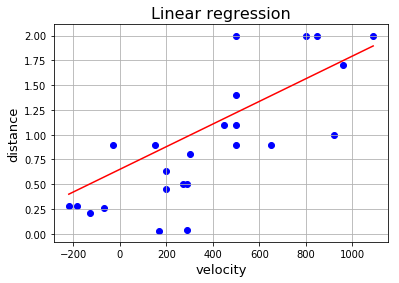

In [5]:
regression_2 = linear_model.LinearRegression()

# fit velocity vs. distance
regression_2.fit(velocity, distance)

# Recuperation des parametres de la droite de regression
m2 = regression_2.coef_[0][0]
b2 = regression_2.intercept_[0]

# ecrire l'equation de la droite
print("Droite de regression d'equation: y = {} x + {}".format(m2, b2))

min_x2 = np.min(velocity)
max_x2 = np.max(velocity)

fig = plt.figure()
plt.grid(True)

# Trace les points du modele
plt.scatter(velocity, distance, color='blue')

# Trace le modele
plt.plot([min_x2, max_x2], [b2, m2 * max_x2 + b2], color='red')

# Customize
plt.title('Linear regression', fontsize=16)
plt.xlabel('velocity', fontsize=13)
plt.ylabel('distance', fontsize=13)

plt.show()